In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Reading dataset.

In [239]:
picks = pd.read_csv('picks_data.csv')
picks.head()

,loosing_hero_id_1,loosing_hero_id_2,loosing_hero_id_3,loosing_hero_id_4,loosing_hero_id_5,winning_hero_id_1,winning_hero_id_2,winning_hero_id_3,winning_hero_id_4,winning_hero_id_5
0,18,28,43,75,84,60,71,74,87,93
1,47,72,78,86,107,11,12,30,38,51
2,21,51,65,71,73,13,63,66,80,89
3,11,26,83,93,110,8,22,33,90,97
4,15,16,21,26,99,7,11,47,93,102


In [240]:
stat = pd.read_csv('stat.csv')
stat.head()

,id,name,type,baseStr,strGrowth,maxStr,baseAgi,agiGrowth,maxAgi,baseInt,...,moveSpeed,baseArmor,minDmg,maxDmg,range,baseAttackTime,attackPoint,attackBackswing,turnRate,regeneration
0,102,Abaddon,0,23,2.6,85.4,17,1.5,53.0,21,...,310,1.43,55,65,150,1.70,0.56,0.41,0.6,1.50
1,68,Ancient Apparition,2,18,1.7,58.8,20,2.2,72.8,25,...,295,1.86,44,54,675,1.70,0.45,0.30,0.6,1.50
2,1,Anti-Mage,1,22,1.5,58.0,22,2.8,89.2,15,...,310,2.14,49,53,150,1.45,0.30,0.60,0.5,1.50
3,2,Axe,0,25,2.8,92.2,20,2.2,72.8,18,...,290,1.86,49,53,150,1.70,0.50,0.50,0.6,4.25
4,3,Bane,2,23,2.4,80.6,23,2.4,80.6,23,...,310,4.29,60,66,400,1.70,0.30,0.70,0.6,1.50


In [241]:
heroes = pd.read_json('heroes.json')
# heroes = heroes.set_index('id')
heroes.head()

,id,name
0,1,Anti-Mage
1,2,Axe
2,3,Bane
3,4,bloodseeker
4,5,crystal_maiden


Creating features.

In [242]:
for i in picks.columns:
    tmp = pd.DataFrame(picks[i].value_counts())
    tmp['id'] = tmp.index
    heroes = pd.merge(heroes, tmp, how='left', on=['id'])
    
heroes = heroes.fillna(0.0)
heroes.iloc[:, 2:] = heroes.iloc[:, 2:].astype(int)
heroes['wins'] = heroes.iloc[:, 7:12].sum(axis=1)
heroes['defeats'] = heroes.iloc[:, 2:7].sum(axis=1)
heroes['total_game'] = heroes['wins'] + heroes['defeats']

In [243]:
heroes.drop(columns=picks.columns, inplace=True)

In [244]:
heroes['win_rate'] = round(heroes['wins'] / heroes['total_game'], 2)
heroes['defeat_rate'] = round(heroes['defeats'] / heroes['total_game'], 2)
heroes['popularity'] = round(heroes['total_game'] / picks.shape[0], 2)
heroes

,id,name,wins,defeats,total_game,win_rate,defeat_rate,popularity
0,1,Anti-Mage,2485,2574,5059,0.49,0.51,0.07
1,2,Axe,3094,3375,6469,0.48,0.52,0.09
2,3,Bane,3086,3070,6156,0.50,0.50,0.09
3,4,bloodseeker,1290,1388,2678,0.48,0.52,0.04
4,5,crystal_maiden,3784,3616,7400,0.51,0.49,0.10
...,...,...,...,...,...,...,...,...
108,105,Techies,254,194,448,0.57,0.43,0.01
109,112,winter_wyvern,2374,2369,4743,0.50,0.50,0.07
110,113,arc_warden,125,127,252,0.50,0.50,0.00
111,108,abyssal_underlord,441,394,835,0.53,0.47,0.01


In [245]:
heroes = pd.merge(heroes, stat, how='left', on=['id', 'name'])

In [246]:
heroes = heroes[~np.isnan(heroes['type'])]

$0-$ strength, $1-$ agility, $2-$ intelligence.

In [247]:
heroes['type'] = heroes['type'].astype(int)
heroes

,id,name,wins,defeats,total_game,win_rate,defeat_rate,popularity,type,baseStr,...,moveSpeed,baseArmor,minDmg,maxDmg,range,baseAttackTime,attackPoint,attackBackswing,turnRate,regeneration
0,1,Anti-Mage,2485,2574,5059,0.49,0.51,0.07,1,22.0,...,310.0,2.14,49.0,53.0,150.0,1.45,0.300,0.600,0.5,1.50
1,2,Axe,3094,3375,6469,0.48,0.52,0.09,0,25.0,...,290.0,1.86,49.0,53.0,150.0,1.70,0.500,0.500,0.6,4.25
2,3,Bane,3086,3070,6156,0.50,0.50,0.09,2,23.0,...,310.0,4.29,60.0,66.0,400.0,1.70,0.300,0.700,0.6,1.50
5,6,Drow Ranger,2388,1831,4219,0.57,0.43,0.06,1,17.0,...,285.0,0.71,40.0,51.0,625.0,1.70,0.700,0.300,0.7,1.50
6,7,Earthshaker,7723,7744,15467,0.50,0.50,0.22,2,22.0,...,310.0,2.71,46.0,56.0,150.0,1.70,0.467,0.863,0.9,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,107,Earth Spirit,1886,1710,3596,0.52,0.48,0.05,2,21.0,...,290.0,3.43,46.0,56.0,150.0,1.70,0.350,0.650,0.6,1.50
105,109,Terrorblade,1153,956,2109,0.55,0.45,0.03,1,15.0,...,310.0,10.14,48.0,54.0,150.0,1.50,0.300,0.600,0.5,3.25
107,111,Oracle,1331,1417,2748,0.48,0.52,0.04,2,18.0,...,305.0,2.14,39.0,45.0,620.0,1.40,0.300,0.700,0.5,1.50
108,105,Techies,254,194,448,0.57,0.43,0.01,2,17.0,...,270.0,7.00,29.0,31.0,700.0,1.70,0.500,0.500,0.5,1.50


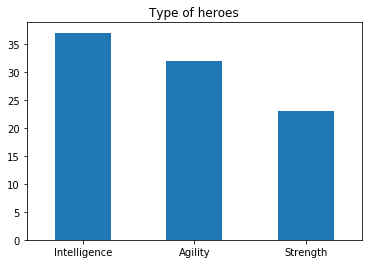

In [248]:
heroes['type'].value_counts().plot.bar(rot=0)
plt.xticks(np.arange(3), ('Intelligence', 'Agility', 'Strength'))
plt.title('Type of heroes')
plt.show()

Finding the most popular heroes.

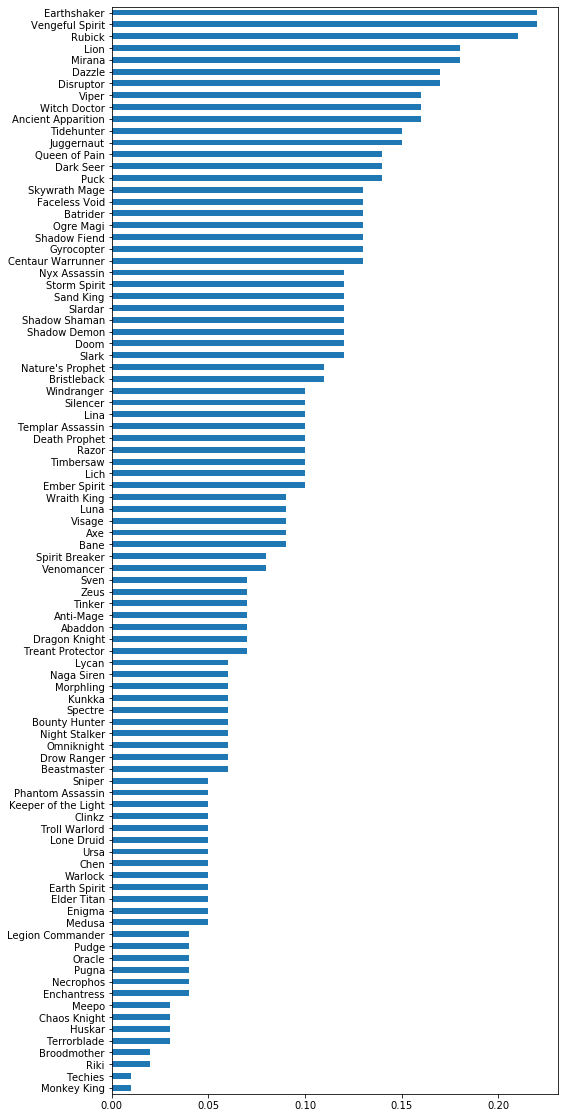

In [249]:
heroes.sort_values('popularity', inplace=True)
heroes['popularity'].plot.barh(figsize=(8, 20))
plt.yticks(np.arange(len(top)), heroes['name'])
plt.show()

# The Most Popular Heroes

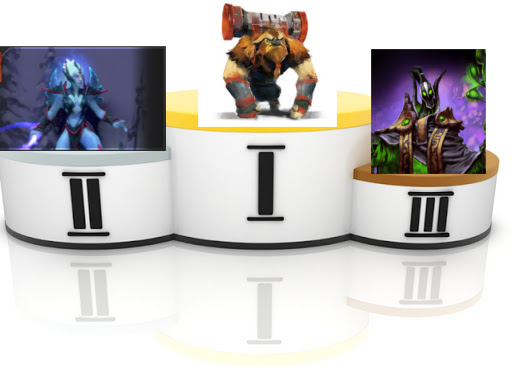

In [250]:
# heroes.loc[top.index[len(top):len(top)-6:-1], :]['name']
myImage = Image.open("unnamed.jpg")
display(myImage)

Let's take a look on correlation matrix.

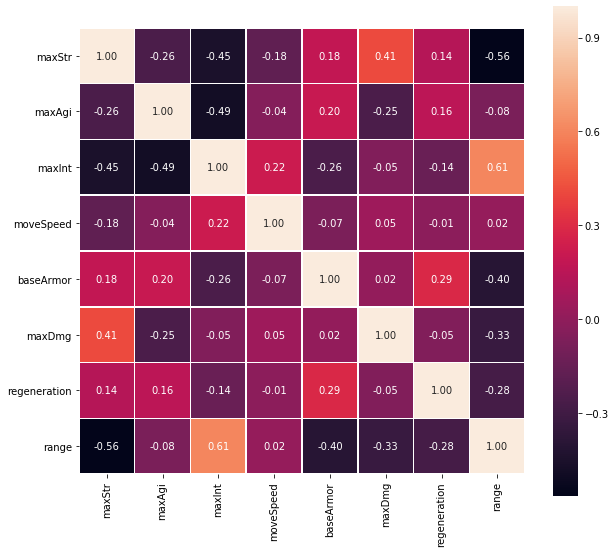

In [251]:
data = heroes[['maxStr', 'maxAgi', 'maxInt', 'moveSpeed', 'baseArmor', 'maxDmg', 'regeneration', 'range']]
f,ax = plt.subplots(figsize=(10, 9))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f', ax=ax, square=True)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.yticks(rotation=0)
plt.ylim(b, t) 
plt.show() 

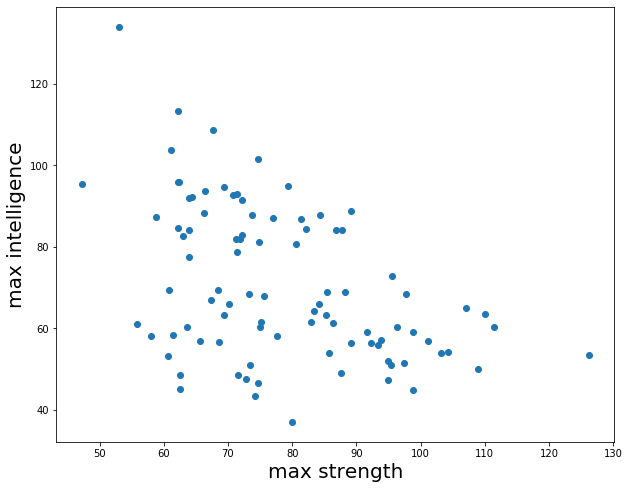

In [256]:
plt.figure(figsize=(10, 8))
plt.scatter(heroes['maxStr'], heroes['maxInt'])
plt.xlabel('max strength', fontsize=20)
plt.ylabel('max intelligence', fontsize=20)
plt.show()

It's so interesting! As you can see the more strength, the less intelligence:)

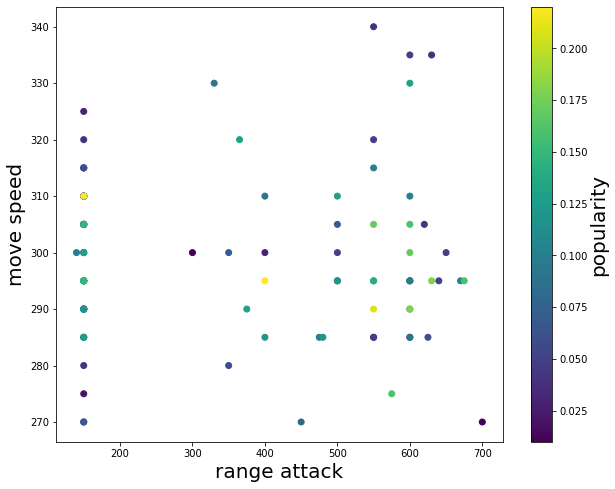

In [253]:
color = heroes['popularity']
plt.figure(figsize=(10, 8))
plt.scatter(heroes['range'], heroes['moveSpeed'], c=color)
cbar= plt.colorbar()
cbar.set_label("popularity", labelpad=+1, fontsize=20)
plt.xlabel('range attack', fontsize=20)
plt.ylabel('move speed', fontsize=20)
plt.show()

The popular heroes have average speed.

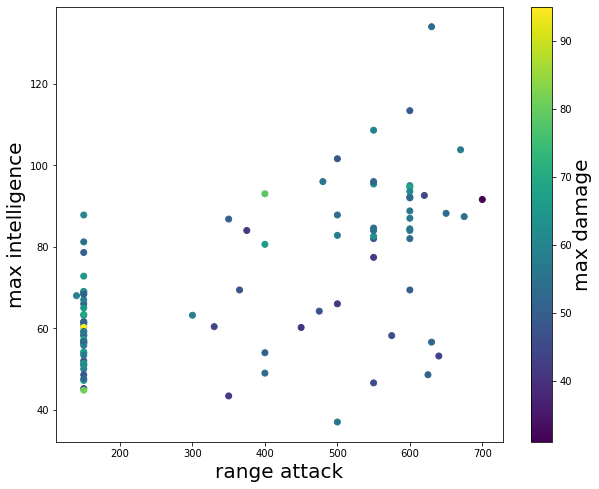

In [254]:
color = heroes['maxDmg']
plt.figure(figsize=(10, 8))
plt.scatter(heroes['range'], heroes['maxInt'], c=color)
cbar= plt.colorbar()
cbar.set_label("max damage", labelpad=+1, fontsize=20)
plt.xlabel('range attack', fontsize=20)
plt.ylabel('max intelligence', fontsize=20)
plt.show()

The intelligence heroes with small range attack have maximum damage.